In [19]:
# 1: Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas display options
pd.set_option('display.max_columns', None)
%matplotlib inline


In [20]:
# 2: Load the raw dataset
df = pd.read_excel("../data/raw/adrec_sales_export.xlsx")

print("Loaded data:", df.shape)
df.head()


c:\Users\97156\OneDrive\Desktop\real_estate_platform\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Loaded data: (96296, 14)


,Asset Class,Property Type,Registration,Sold Area / GFA (sqm),Plot Area (sqm),Rate (AED/sqm),Layout,District,Community,Project,Price (AED),Share,Sale Type,Sequence
0,other,other commercial plot,2025-11-26 17:43:08,675.00,675.00,2384.73,unclassified,Al Faqa',Shibak 1,Nakheel Oasis (Plots),1609694.0,1.0,off-plan,primary
1,residential,villa,2025-11-26 17:43:08,436.58,583.98,25159.16,4 beds,Al Hidayriyyat,Al Hidayriyyat Island,Nawayef East B,10983985.0,1.0,off-plan,primary
2,residential,apartment,2025-11-26 17:33:05,31.53,11140.24,34541.71,studio,Yas Island,YN7,Yas Living,1089100.0,1.0,off-plan,primary
3,residential,apartment,2025-11-26 17:33:05,43.18,2941.20,15371.93,studio,Al Shamkhah,SH36,Nour Watan,663760.0,1.0,off-plan,primary
4,residential,apartment,2025-11-26 17:23:01,83.22,4282.65,13175.31,1 bed,Yas Island,YS2,Diva at the Bay 1,1096449.0,1.0,off-plan,primary


In [21]:
# 3: Check for missing values
missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Missing values:")
display(missing)


Missing values:


Rate (AED/sqm)           4015
Sold Area / GFA (sqm)    3990
Registration                2
Property Type               2
Plot Area (sqm)             2
Layout                      2
Price (AED)                 2
District                    2
Community                   2
Project                     2
Sale Type                   2
Share                       2
Sequence                    2
Asset Class                 1
dtype: int64

In [22]:
# 4: Descriptive statistics
df.describe(include='all').transpose()


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Asset Class,96295,11,residential,89216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property Type,96294,41,apartment,46092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Registration,96294,NaN,NaN,NaN,2022-12-22 14:32:51.168764672,2019-01-02 06:52:46,2020-12-10 14:08:09.500000,2023-06-06 12:03:05,2024-11-22 11:52:18,2025-11-26 17:43:08,NaN
Sold Area / GFA (sqm),92306.0,NaN,NaN,NaN,8357.790665,0.0,91.67,158.32,447.7175,8895514.04,85580.634263
Plot Area (sqm),96294.0,NaN,NaN,NaN,32175.293752,0.0,609.13,4038.35,25720.27,8895514.04,71257.659607
Rate (AED/sqm),92281.0,NaN,NaN,NaN,18453.890007,0.0,7203.92,11964.38,15586.89,120000000.0,680714.543907
Layout,96294,15,unclassified,23753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
District,96294,130,Al Reem Island,20702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Community,96294,910,Al Reef,6261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Project,96294,343,Private,18095,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Found 15331 potential price outliers


,Rate (AED/sqm),Community,Registration
1,25159.16,Al Hidayriyyat Island,2025-11-26 17:43:08
2,34541.71,YN7,2025-11-26 17:33:05
13,23024.09,Al Hidayriyyat Island,2025-11-26 17:02:55
16,26903.23,Al Hidayriyyat Island,2025-11-26 17:02:55
38,28398.77,Al Hidayriyyat Island,2025-11-26 16:32:39
51,24405.53,YN7,2025-11-26 15:52:13
53,22167.34,Ghantout,2025-11-26 15:42:04
57,28213.61,Ghantout,2025-11-26 15:42:03
58,20611.54,YN7,2025-11-26 15:42:02
60,59309.79,SDN8,2025-11-26 15:32:05


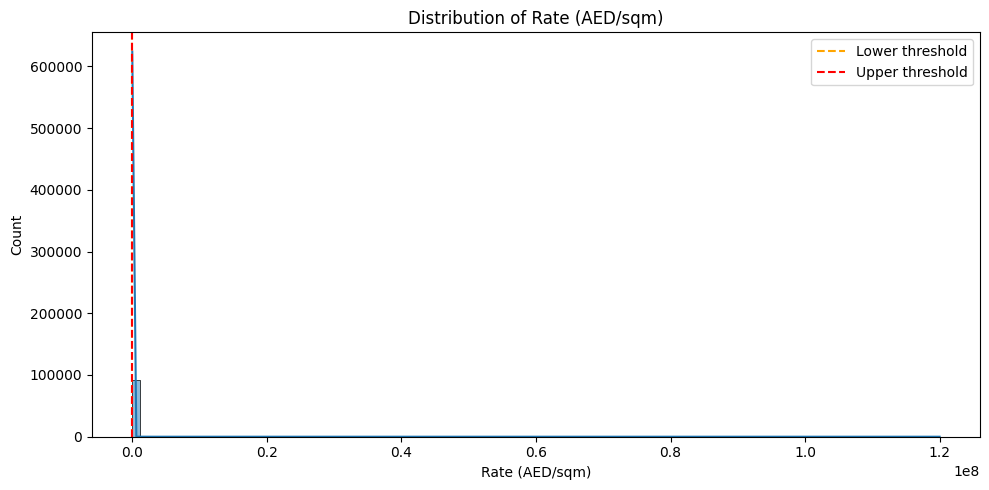

In [23]:
# 5: Price distribution and outliers
price_col = "Rate (AED/sqm)"
low_threshold = 500
high_threshold = 20000

# Outlier rows
outliers = df[(df[price_col] < low_threshold) | (df[price_col] > high_threshold)]
print(f"Found {len(outliers)} potential price outliers")
display(outliers[[price_col, "Community", "Registration"]].head(10))

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df[price_col].dropna(), bins=100, kde=True)
plt.axvline(low_threshold, color='orange', linestyle='--', label='Lower threshold')
plt.axvline(high_threshold, color='red', linestyle='--', label='Upper threshold')
plt.title("Distribution of Rate (AED/sqm)")
plt.xlabel("Rate (AED/sqm)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
# 6: Top communities by sample count
df["Community"].value_counts().head(15)


Community
Al Reef                  6261
YS1                      5374
RT3                      4667
YN7                      4634
RT1                      3807
MZ12                     3140
SDN8                     3063
SH36                     2971
RS6                      2656
YS3_06                   2439
YS2                      2431
SE45_05                  2410
SDE3                     2266
SH35                     2134
Al Hidayriyyat Island    2064
Name: count, dtype: int64

In [ ]:
# 7: Clean data — missing values and outliers

# Drop rows with missing critical fields
critical_fields = [
    "Rate (AED/sqm)", "Sold Area / GFA (sqm)", "Registration",
    "Property Type", "Plot Area (sqm)", "Layout", "Price (AED)",
    "District", "Community", "Project", "Sale Type", "Share",
    "Sequence", "Asset Class"
]
df_cleaned = df.dropna(subset=critical_fields).copy()

# Filter out extreme outliers in Rate (AED/sqm)
upper_threshold = 20000  # set threshold for max reasonable rate
df_cleaned = df_cleaned[df_cleaned["Rate (AED/sqm)"] < upper_threshold]

# Remove zero or nonsensical areas or prices
df_cleaned = df_cleaned[
    (df_cleaned["Sold Area / GFA (sqm)"] > 10) & 
    (df_cleaned["Price (AED)"] > 10000)
]

# Reset index
df_cleaned = df_cleaned.reset_index(drop=True)

# Save cleaned full dataset
cleaned_path = "../data/processed/cleaned_adrec_full.csv"
df_cleaned.to_csv(cleaned_path, index=False)

print(f"Cleaned data saved to {cleaned_path}")
print("Cleaned shape:", df_cleaned.shape)


Cleaned data saved to ../data/processed/cleaned_adrec_full.csv
Cleaned shape: (81820, 14)
